## Using custom rules to bring expressions into a standard form

Not sure if that is the best way, but it's something that works. ``replace`` can also work with wildcards, so maybe that would be a more general option.

What I want to address here is that by specifying ``noncommutative=False`` also $k_y$ and $V(x)$ are not commutative. One can use substitution rules to fix that issue:

In [37]:
import sympy
sympy.init_printing()

In [52]:
kx, ky = sympy.symbols("k_x, k_y", commutative=False)

In [39]:
a, b = sympy.symbols("a, b", commutative=True)

In [54]:
V = sympy.Function("V")
x, y = sympy.symbols("x, y", commutative=False)

In [56]:
V(x, y)

In [62]:
expression = ky*ky *V(x)* a * kx

In [63]:
expression

In [66]:
expression.subs([(ky*V(x), V(x)*ky)], simultaneous=True)

In [67]:
def apply_rules_recursively(expr, rules):
    expression2 = None
    while expression2 != expr:
        expression2 = expr
        expr = expr.subs(rules)
    
    return expr

In [68]:
rules = [(ky*kx, kx*ky), (ky*V(x), V(x)*ky), (kx*V(y), V(y)*kx)]

In [69]:
apply_rules_recursively(expression, rules)

In [70]:
apply_rules_recursively(kx * ky *V(x)*V(y), rules)

## In principle one could also do rules that give me derivatives of functions

In [71]:
V = sympy.Function('V')
x, y, z = sympy.symbols("x, y, z", commutative=False)
x2 = sympy.symbols("x2", commutative=True)

Those kind of rules you could make of course automatically.

In [77]:
rules2 = rules
rules2.extend([(kx*V(x), -sympy.I*sympy.diff(V(x), x)*kx),
               (kx*sympy.diff(V(x),x),  -sympy.I*sympy.diff(sympy.diff(V(x),x), x)*kx)])

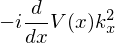

In [79]:
apply_rules_recursively(kx*V(x)*kx, rules2)

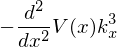

In [78]:
apply_rules_recursively(kx*kx*V(x)*kx, rules2)

Possibly for this kind of thing replace which can do pattern matching might be better (didn't check.)